In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install mtcnn
from keras.models import Model, Sequential
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dropout, Activation
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from matplotlib.patches import Rectangle 
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
from scipy import spatial
import numpy as np
import cv2
import pandas as pd

     |████████████████████████████████| 2.3MB 3.9MB/s 


In [ ]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [ ]:
from keras.models import model_from_json
#model.load_weights('/content/gdrive/MyDrive/A - Academics UM/A - Machine Learning/Grp Project/Final Trial v1.0/vgg_face_weights.h5')
model.load_weights('/content/gdrive/MyDrive/Final Trial v1.0/vgg_face_weights.h5')

vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [ ]:
def extract_face(filename, image_size=(224, 224)):
  image = cv2.imread(filename)
  image_data = np.asarray(image)
  detector = MTCNN()
  results = detector.detect_faces(image_data)
  x_0, y_0, width_0, height_0 = results[0]['box']
  x_0, y_0 = abs(x_0), abs(y_0)
  x_0_up, y_0_up = x_0 + width_0, y_0 + width_0
  face_0 = image_data[y_0:y_0_up, x_0:x_0_up]
  face_array_0 = cv2.resize(face_0,image_size,interpolation=cv2.INTER_CUBIC)
  face_array_0 = face_array_0.reshape(1, 224, 224, 3)

  x_1, y_1, width_1, height_1 = results[1]['box']
  x_1, y_1 = abs(x_1), abs(y_1)
  x_1_up, y_1_up = x_1 + width_1, y_1 + width_1
  face_1 = image_data[y_1:y_1_up, x_1:x_1_up]
  face_array_1 = cv2.resize(face_1,image_size,interpolation=cv2.INTER_CUBIC)
  face_array_1 = face_array_1.reshape(1, 224, 224, 3)
  return face_array_0, face_array_1

In [ ]:
def get_embeddings(file):
  faces_0, faces_1 = extract_face(file)
  samples_0 = np.asarray(faces_0, 'float32')
  samples_0 = preprocess_input(samples_0)
  representation_0 = vgg_face_descriptor.predict(samples_0)
  samples_1 = np.asarray(faces_1, 'float32')
  samples_1 = preprocess_input(samples_1)
  representation_1 = vgg_face_descriptor.predict(samples_1)
  return representation_0, representation_1

In [ ]:
def draw_image_with_boxes(filename, result_list):
  data = plt.imread(filename)
  plt.imshow(data)
  ax = plt.gca()
  for result in result_list:
    x, y, width, height = result['box']
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    ax.add_patch(rect)
  plt.show()

In [ ]:
def findFace(filename):
  pixels = plt.imread(filename)
  detector = MTCNN()
  faces = detector.detect_faces(pixels)
  draw_image_with_boxes(filename, faces)

In [ ]:
def twoFace(filename):
  image = cv2.imread(filename)
  image_data = np.asarray(image)
  detector = MTCNN()
  results = detector.detect_faces(image_data)
  return len(results)

In [ ]:
def calculateCompatibility(file):
  representation_0, representation_1 = get_embeddings(file)
  findFace(file)
  d = spatial.distance.cosine(representation_0, representation_1)
  print("Compatibility : {:.5f}%".format(d * 100))

In [ ]:
#twoFace('/content/gdrive/MyDrive/A - Academics UM/A - Machine Learning/Grp Project/Final Trial v1.0/Dataset/Couple/train1.jpg')
twoFace('/content/gdrive/MyDrive/Final Trial v1.0/Dataset/Couple/train1.jpg')

2

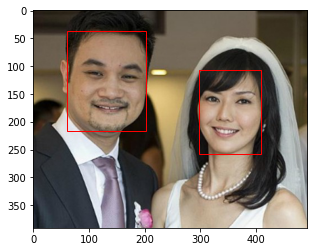

Compatibility : 64.18387%


In [ ]:
#calculateCompatibility('/content/gdrive/MyDrive/A - Academics UM/A - Machine Learning/Grp Project/Final Trial v1.0/Dataset/Couple/train1.jpg')
calculateCompatibility('/content/gdrive/MyDrive/Final Trial v1.0/Dataset/Couple/train1.jpg')

In [ ]:
from scipy import stats
def distanceGenerator(file):
  representation_0, representation_1 = get_embeddings(file)
  #print((representation_0[0]))
  #print((representation_1[0]))
  dCosine = spatial.distance.cosine(representation_0, representation_1)
  dEuc = np.linalg.norm(representation_0 - representation_1)
  #print(type(representation_0))
  Pear = stats.pearsonr(representation_0[0], representation_1[0])
  #print(Pear)
  return dCosine, dEuc, Pear[0], Pear[1]


In [ ]:
from scipy import ndimage, misc
import os

def datasetFromImage(path, couple):
  dCosineArr = np.array([])
  dEucArr = np.array([])
  PearRArr = np.array([])
  PearPArr = np.array([])
  for image_path in os.listdir(path):
    input_path = os.path.join(path, image_path)
    if twoFace(input_path) == 2:
      dCosine, dEuc, PearR, PearP = distanceGenerator(input_path)
      dCosineArr = np.append(dCosineArr, dCosine)
      dEucArr = np.append(dEucArr, dEuc)
      PearRArr = np.append(PearRArr, PearR)
      PearPArr = np.append(PearPArr, PearP)
  if couple == True:
    LabelArr = np.ones(dCosineArr.shape)
  else:
    LabelArr = np.zeros(dCosineArr.shape)
  return dCosineArr, dEucArr, PearRArr, PearPArr, LabelArr

In [ ]:
def dataset(couplePath, notCouplePath):
  dCosineArrC, dEucArrC, PearRArrC, PearPArrC, LabelArrC = datasetFromImage(couplePath, True)
  dCosineArrNC, dEucArrNC, PearRArrNC, PearPArrNC, LabelArrNC = datasetFromImage(notCouplePath, False)
  dCosineArr = np.concatenate([dCosineArrC,dCosineArrNC])
  dEucArr = np.concatenate([dEucArrC,dEucArrNC])
  PearRArr = np.concatenate([PearRArrC,PearRArrNC])
  PearPArr = np.concatenate([PearPArrC,PearPArrNC])
  LabelArr = np.concatenate([LabelArrC,LabelArrNC])
  dataset = pd.DataFrame({'Cosine': dCosineArr, 'Euclidean': dEucArr, 'PearsonR': PearRArr, 'PearsonP': PearPArr, 
                          'Label': LabelArr}, columns=['Cosine', 'Euclidean', 'PearsonR', 'PearsonP', 'Label'])
  return dataset
  #return dCosineArr, dEucArr, PearRArr, PearPArr, LabelArr

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import numpy as np 
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import torch.utils.data as data_utils
import matplotlib.pyplot as plt

seed = 98
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(seed)

In [ ]:
# Training Dataset
#trainDf = dataset('/content/gdrive/MyDrive/A - Academics UM/A - Machine Learning/Grp Project/Final Trial v1.0/Dataset/Couple', 
#                  '/content/gdrive/MyDrive/A - Academics UM/A - Machine Learning/Grp Project/Final Trial v1.0/Dataset/notCouple')
trainDf = pd.read_csv('/content/gdrive/MyDrive/Final Trial v1.0/dataset.csv')
trainLabel = trainDf.pop('Label')
#trainDataset = tf.data.Dataset.from_tensor_slices((trainDf.values, trainLabel.values))
train_tensor = data_utils.TensorDataset(torch.tensor(trainDf.values.astype(np.float64)), torch.tensor(trainLabel.values.astype(np.float64))) 

# Testing Dataset
# testDf = dataset('', '')
# testLabel = testDf.pop('Label')
# testDataset = tf.data.Dataset.from_tensor_slices((testDf.values, testLabel.values))
# test_tensor = data_utils.TensorDataset(torch.tensor(testDf), torch.tensor(testLabel))

In [ ]:
batchSize = 128
train_loader = data_utils.DataLoader(dataset = train_tensor, batch_size = batchSize, shuffle = True)
# test_loader = data_utils.DataLoader(dataset = test_tensor, batch_size = batchSize, shuffle = False)

In [ ]:
class MLP(nn.Module): # nn.Module is base class for all neural network modules

  def __init__(self): # constructor
    super(MLP, self).__init__() # update to parent class

    # 2 hidden layers of (512) nodes in each 
    hidden_1 = 512 # 2^9
    hidden_2 = 512 # 2^9

    # linear layer (224*224 input layer --> hidden 1)
    # become linear layer (128*4 input layer --> hidden 1)
    self.fc1 = nn.Linear(4, hidden_1)
    # linear layer (hideen 1  --> hidden 2)
    self.fc2 = nn.Linear(hidden_1, hidden_2)
    #linear layer (hidden 2 --> 2 output nodes)
    self.fc3 = nn.Linear(hidden_2, 2)

    # dropout layer (p=0.5) to prevent overfitting
    self.dropout = nn.Dropout(0.5)

  def forward(self, x):
    # add hidden layer 1, with relu activation function 
    x = F.relu(self.fc1(x))

    # add dropout layer
    x = self.dropout(x)

    # add hidden layer 2, with relu activation function 
    x = F.relu(self.fc2(x))

    # add dropout layer
    x = self.dropout(x)

    # add output layer
    x = self.fc3(x)

    return x

In [ ]:
model = MLP()
criterion = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
n_epochs = 10 # epoch loop
epoch_loss = np.array([]) # to store loss by epoch
batches_loss = np.array([]) # to store loss by minibatches

for epoch in range(0,n_epochs):
  # monitor training loss
  train_loss = 0.0
  train_wrong = 0 # to track wrongly predicted label
  total_y = 0 # to track total labels

  # model training 
  model.train() # initiating model for training 
  for data, y in train_loader:
    # clear previous gradients of all optimised variables
    optimiser.zero_grad()

    # forward pass method : compute predicted outputs by passing inputs to the model
    output = model(data.float())

    # loss computing
    y = y.type(torch.LongTensor) # categorical value must be in long
    loss = criterion(output, y)
    _, preds = torch.max(output, 1)
    #print(output.shape)
    #print(output[0])
    #print(preds)
    #print(y.shape)
    #print('y is ', y)
    train_wrong += int((preds != y).sum()) # to track wrongly predicted label
    total_y += int(y.shape[0]) # to track total labels

    # backprop : compute gradient of loss with respect to model parameters
    loss.backward()

    # perform single optimisation step (parameters update)
    optimiser.step()

    # update training loss
    train_loss += loss.item()*data.size(0) # to get the loss of a batch 
    batches_loss = np.append(batches_loss, loss.item()) # append loss by minibatches

  # calc average loss over an epoch
  train_loss = train_loss/len(train_loader.dataset) # compute the overall average loss of an epoch
  epoch_loss = np.append(epoch_loss, train_loss) # append loss by epoch

  # print training statistics
  print('Epoch: {} \tTraining Loss: {:.6f} '.format(epoch+1, train_loss))

  # print training accuracy
  print('Accuracy: {:.3f}% '.format(100 - (train_wrong * 100/total_y)))

  # save model 
  torch.save(model.state_dict(), 'model.pt')

Epoch: 1 	Training Loss: 131.895003 
Accuracy: 48.235% 
Epoch: 2 	Training Loss: 0.879686 
Accuracy: 46.765% 
Epoch: 3 	Training Loss: 0.775426 
Accuracy: 48.529% 
Epoch: 4 	Training Loss: 0.737338 
Accuracy: 50.294% 
Epoch: 5 	Training Loss: 0.763114 
Accuracy: 46.765% 
Epoch: 6 	Training Loss: 0.753489 
Accuracy: 48.824% 
Epoch: 7 	Training Loss: 0.719030 
Accuracy: 55.000% 
Epoch: 8 	Training Loss: 0.741666 
Accuracy: 49.706% 
Epoch: 9 	Training Loss: 0.721577 
Accuracy: 50.294% 
Epoch: 10 	Training Loss: 0.699219 
Accuracy: 50.294% 


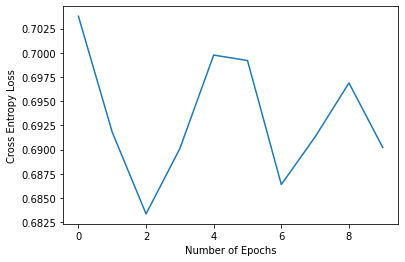

In [ ]:
plt.plot(range(n_epochs),epoch_loss)
plt.xlabel("Number of Epochs")
plt.ylabel("Cross Entropy Loss")
plt.show()

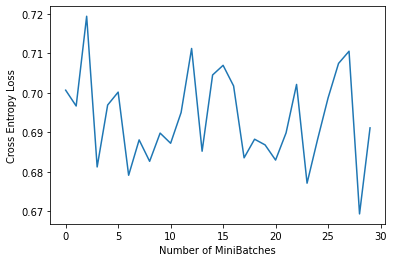

In [ ]:
plt.plot(range(len(batches_loss)),batches_loss)
plt.xlabel("Number of MiniBatches")
plt.ylabel("Cross Entropy Loss")
plt.show()

In [ ]:
from scipy import stats
a = np.array([0, 0, 0, 1, 1, 1, 1])
b = np.array([0, 0, 0, 1, 1, 1, 1])
c = stats.pearsonr(a, b)
c[0]

0.9999999999999997

In [ ]:
# trying to have fun with logistic regression
# sigmoid function
def sigmoid(z):
    # convert input to a numpy array
    z = np.array(z)
    
    g = np.zeros(z.shape)
    
    def f(x) :
        return (1/(1 + np.exp(-x)))
    
    g = np.array(f(z))
    
    return g

# cost function with  reglarization
def costFunctionReg(theta, X, y, lambda_):
    m = y.size  # number of training examples

    J = 0
    grad = np.zeros(theta.shape)
    H = sigmoid(np.dot(X, theta))
    
    partOfCost = 0
    for i in range(m):
        partOfCost += (y[i]*np.log(H[i]) + (1-y[i])*np.log(1-H[i]))
    
    J = -(1/m)*(partOfCost) + lambda_/(2*m)*sum(theta**2)
    
    grad[0] = 1/m*np.dot(X.transpose(),(H-y).transpose())[0]
    for j in range(len(grad)-1):
        grad[j+1] = 1/m*np.dot(X.transpose(),(H-y).transpose())[j+1] + lambda_/m*theta[j+1]
    
    return J, grad

In [ ]:
# load the data for logistic regression
X = trainDf.to_numpy()
y = trainLabel.to_numpy()
#print(X)
#print(y)

X = np.concatenate([np.ones((X.shape[0],1)), X], axis = 1)
#print(X)

[[1.00000000e+000 6.28103018e-001 1.63095078e+002 3.71897008e-001
  8.56851313e-087]
 [1.00000000e+000 5.58385700e-001 1.48710953e+002 4.41614318e-001
  1.32808591e-125]
 [1.00000000e+000 6.72842205e-001 1.64296631e+002 3.27157792e-001
  1.86854150e-066]
 ...
 [1.00000000e+000 5.89128584e-001 1.15233856e+002 4.10871359e-001
  2.41005286e-107]
 [1.00000000e+000 6.42983347e-001 1.48270950e+002 3.57016608e-001
  1.16728264e-079]
 [1.00000000e+000 4.58873987e-001 1.37969391e+002 5.41125992e-001
  2.21539747e-199]]


In [ ]:
from scipy import optimize
#initialize theta for logistic regression
initial_theta = np.zeros(5)

lambda_ = 0

cost, grad = costFunctionReg(initial_theta, X, y, lambda_)
print(cost, grad)

0.6931471805599467 [-2.35294118e-02 -3.56884726e-02 -6.69063294e+00  1.21590628e-02
 -5.33730783e-12]


In [ ]:
# set options for optimize.minimize
options= {'maxiter': 600}
res = optimize.minimize(costFunctionReg,
                        initial_theta,
                        (X, y, lambda_),
                        jac=True,
                        method='TNC',
                        options=options)
cost = res.fun #get cost
theta = res.x #get theta

print(theta)

[-5.56414052e-03  1.58477048e+00  3.84172301e-03 -2.14287618e+00
  7.58518793e-10]


In [ ]:
def predict(theta, X):
    m = X.shape[0] # Number of training examples
    p = np.zeros(m)
    
    H = sigmoid(np.dot(X, theta))
    
    for i in range(m): 
        if (H[i] >= 0.5):
            p[i] = 1
        else:
            p[i] = 0
    
    return p

In [ ]:
p = predict(theta, X)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))

Train Accuracy: 65.29 %
